In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [3]:
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [5]:
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

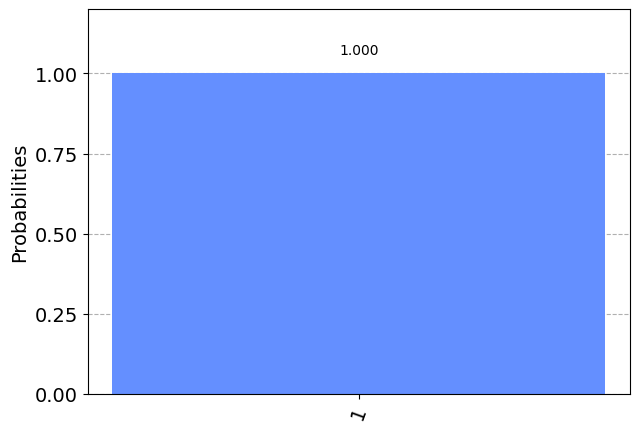

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [11]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


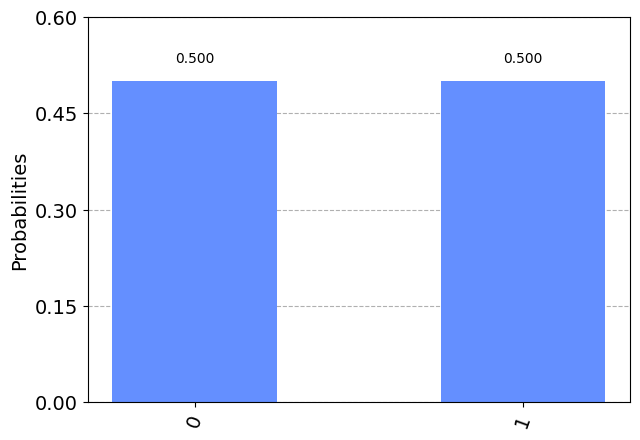

In [12]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [21]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()

┌──────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711j) ├
   └──────────────────────────────┘